# Imports

In [1]:
import collections
import pandas as pd
import argparse
import time
import numpy as np

In [2]:
import noise_estimator

In [3]:
from ucbq_agent_stateless import UCBQAgent
from ucbq_environment_stateless import ModifiedRandomEnvironment

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm 
import utils

from modified_pendulum_processor import ModifiedPendulumProcessor

from utils import *

# Params

In [5]:
def default_params():
    """ These are the default parameters used in the framework. """
    return {
            # Runner parameterr
            'max_steps': 75,
            'num_episodes': 10000,
            'num_actions': 7, 
            'start_action': 0, 
            'correct_action': 1,    # Zero indexed 
            # Optimization parameters
            'alpha': 0.5,                       # learning rate of optimizer
            'alpha_decay': 40,
            'alpha_min': 0.001,
            # Exploration parameters
            'epsilon': 1,               # annealing starts at this epsilon
            'epsilon_decay': 20,
            'epsilon_min': 0.01,    
            'gamma': 0.95,                    # discount factor gamma
            'plots': False,
            'noise': True,
            'surrogate': False,
            'surrogate_c_interval': 10,
            'surrogate_c_interval_min': 30,
           }

# Bayesian optimization

In [7]:
from bayes_opt import BayesianOptimization

In [8]:
def objective(
        alpha,
        alpha_decay,
        alpha_min,
        epsilon,
        epsilon_decay,
        epsilon_min,
        gamma,
        surrogate_c_interval,
        ):
    # # 'surrogate_c_interval': [1, 2, 5, 10, 20, 40]
    # # 'surrogate_lr'    
    # convergence_number_of_consequent_actions
    # intial_q_values: [0, -7]

    # surrogate_c_interval = int(surrogate_c_interval)

    new_params = {
        'alpha': alpha, 
        'alpha_decay': alpha_decay,
        'alpha_min': alpha_min,
        'epsilon': epsilon, 
        'epsilon_decay': epsilon_decay,
        'epsilon_min': epsilon_min,
        'gamma': gamma,
        'surrogate_c_interval': surrogate_c_interval,
        #
        'noise': True,
        'surrogate': True,
        # 'diag': 0.9     
    }

    params = default_params() | new_params

    q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy, _ = qLearningExperiment(params=params)
    


    # params['surrogate'] = False
    # q_values_all_experiments, rewards_all_experiments, episode_lengths, selected_actions, accuracy_no_surrogate, _ = qLearningExperiment(params=params)


    # accuracy = accuracy_surrogate - accuracy_no_surrogate
    
    mean_episode_length = np.mean(episode_lengths)
    print(mean_episode_length)
    # return -mean_episode_length
    return accuracy

optimizer = BayesianOptimization(
    f=objective,
    pbounds={
        'alpha': (0, 1), 
        'alpha_decay': (1, 1000),
        'alpha_min': (0, 1),
        'epsilon': (0, 1), 
        'epsilon_decay': (10, 80),
        'epsilon_min': (0, 1),
        'gamma': (0, 1),
        'surrogate_c_interval': (1, 120)
        },
    random_state=1,
)

# n_iter: How many steps of bayesian optimization you want to perform. 
# The more steps the more likely to find a good maximum you are.
# init_points: How many steps of random exploration you want to perform.
# Random exploration can help by diversifying the exploration space.
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

best_params = optimizer.max['params']

print(optimizer.max)

|   iter    |  target   |   alpha   | alpha_... | alpha_min |  epsilon  | epsilo... | epsilo... |   gamma   | surrog... |
-------------------------------------------------------------------------------------------------------------------------


100%|██████████| 10000/10000 [00:21<00:00, 475.92it/s]


59.8267
| 1         | 42.21     | 0.417     | 720.6     | 0.0001144 | 0.3023    | 20.27     | 0.09234   | 0.1863    | 42.12     |


100%|██████████| 10000/10000 [00:20<00:00, 486.87it/s]


75.0
| 2         | 85.82     | 0.3968    | 539.3     | 0.4192    | 0.6852    | 24.31     | 0.8781    | 0.02739   | 80.79     |


100%|██████████| 10000/10000 [00:24<00:00, 404.97it/s]


70.9682
| 3         | 61.01     | 0.4173    | 559.1     | 0.1404    | 0.1981    | 66.05     | 0.9683    | 0.3134    | 83.39     |


100%|██████████| 10000/10000 [00:21<00:00, 466.38it/s]


59.0942
| 4         | 43.59     | 0.8764    | 894.7     | 0.08504   | 0.03905   | 21.89     | 0.8781    | 0.09835   | 51.11     |


100%|██████████| 10000/10000 [00:24<00:00, 401.34it/s]


74.8108
| 5         | 68.97     | 0.9579    | 533.6     | 0.6919    | 0.3155    | 58.06     | 0.8346    | 0.01829   | 90.27     |


100%|██████████| 10000/10000 [00:23<00:00, 424.12it/s]


74.9386
| 6         | 83.04     | 0.9889    | 748.4     | 0.2804    | 0.7893    | 17.23     | 0.4479    | 0.9086    | 35.94     |


100%|██████████| 10000/10000 [00:23<00:00, 426.35it/s]


72.3092
| 7         | 54.39     | 0.2878    | 130.9     | 0.01937   | 0.6788    | 24.81     | 0.2655    | 0.4916    | 7.35      |


100%|██████████| 10000/10000 [00:22<00:00, 437.98it/s]


74.8515
| 8         | 88.55     | 0.5741    | 147.6     | 0.5893    | 0.6998    | 17.16     | 0.4141    | 0.6944    | 50.29     |


100%|██████████| 10000/10000 [00:21<00:00, 456.91it/s]


74.9997
| 9         | 99.35     | 0.04995   | 536.4     | 0.6638    | 0.5149    | 76.12     | 0.5866    | 0.9034    | 17.36     |


100%|██████████| 10000/10000 [00:22<00:00, 451.47it/s]


68.2493
| 10        | 98.51     | 0.1393    | 807.6     | 0.3977    | 0.1654    | 74.93     | 0.3478    | 0.7508    | 87.39     |


100%|██████████| 10000/10000 [00:20<00:00, 493.26it/s]


75.0
| 11        | 73.37     | 0.8515    | 749.5     | 0.7818    | 0.8793    | 18.09     | 0.9373    | 0.6949    | 38.35     |


100%|██████████| 10000/10000 [00:22<00:00, 451.71it/s]


75.0
| 12        | 0.0       | 0.0       | 536.3     | 0.7094    | 0.5049    | 77.23     | 0.5408    | 0.9033    | 10.16     |


100%|██████████| 10000/10000 [00:22<00:00, 445.96it/s]


74.9965
| 13        | 99.39     | 0.06732   | 536.4     | 0.648     | 0.5185    | 75.74     | 0.6025    | 0.9035    | 19.86     |


100%|██████████| 10000/10000 [00:19<00:00, 502.15it/s]


59.3756
| 14        | 71.3      | 0.3789    | 804.6     | 0.4727    | 0.4771    | 71.81     | 0.08308   | 0.4731    | 85.36     |


100%|██████████| 10000/10000 [00:23<00:00, 419.45it/s]


74.9522
| 15        | 79.36     | 0.8765    | 539.6     | 0.02204   | 0.4164    | 75.05     | 0.4687    | 0.4963    | 24.61     |


100%|██████████| 10000/10000 [00:25<00:00, 397.98it/s]


74.6017
| 16        | 80.41     | 0.6907    | 539.9     | 0.1974    | 0.3424    | 79.38     | 0.3201    | 0.1761    | 18.6      |


100%|██████████| 10000/10000 [00:23<00:00, 423.34it/s]


74.7779
| 17        | 99.43     | 0.1271    | 538.6     | 0.3407    | 0.3596    | 71.65     | 0.9869    | 0.9045    | 19.21     |


100%|██████████| 10000/10000 [00:23<00:00, 433.13it/s]


74.9958
| 18        | 74.56     | 0.8913    | 815.7     | 0.3522    | 0.6657    | 75.11     | 0.5598    | 0.4603    | 83.69     |


100%|██████████| 10000/10000 [00:24<00:00, 403.33it/s]


73.8414
| 19        | 75.87     | 0.9293    | 537.3     | 0.7676    | 0.4979    | 68.05     | 0.2379    | 0.4111    | 19.51     |


100%|██████████| 10000/10000 [00:24<00:00, 415.81it/s]

74.2036
| 20        | 70.29     | 0.9958    | 809.8     | 0.6558    | 0.8631    | 77.32     | 0.221     | 0.03326   | 88.75     |
{'target': 99.42999999999999, 'params': {'alpha': 0.12708682895337786, 'alpha_decay': 538.6199305470005, 'alpha_min': 0.3407139712358348, 'epsilon': 0.35959935166361845, 'epsilon_decay': 71.64649449808573, 'epsilon_min': 0.9868919961750783, 'gamma': 0.904542101158647, 'surrogate_c_interval': 19.20687806175444}}


100%|██████████| 10000/10000 [00:37<00:00, 266.01it/s]


Accuracy: 76.21
Mean episode length: 100.117
Last reward processor:
Estimated confusion matrix:


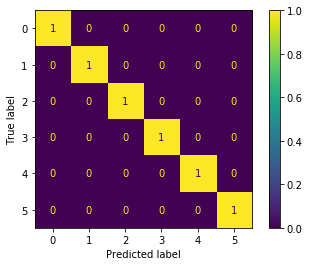

Reward sets:
(0, 0): [-1, 0]
(0, 1): [-1, 0, 0, -1, 0, -2, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1]
(0, 2): [-2, -1]
(0, 3): [-2, -2, -2, -2, -1]
(0, 4): [-4, -3, -3, -3]
(0, 5): [-4, -4, -4, -4, -4]
(0, 6): [-5, -4, -4]
Reward set counts:
Key (0, 0): 2 items
Key (0, 1): 51 items
Key (0, 2): 2 items
Key (0, 3): 5 items
Key (0, 4): 4 items
Key (0, 5): 5 items
Key (0, 6): 3 items


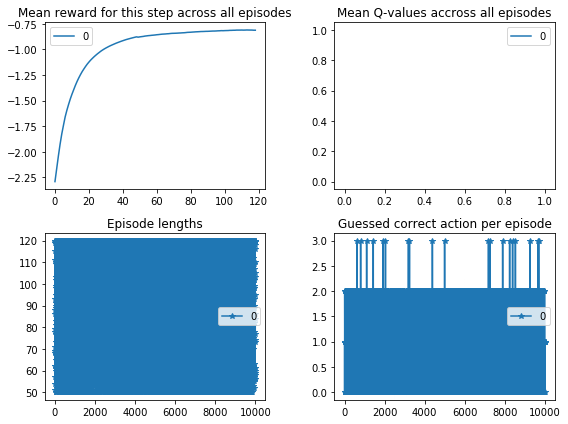

100%|██████████| 10000/10000 [00:37<00:00, 267.62it/s]


Accuracy: 75.02
Mean episode length: 99.5867
Last reward processor:
Estimated confusion matrix:


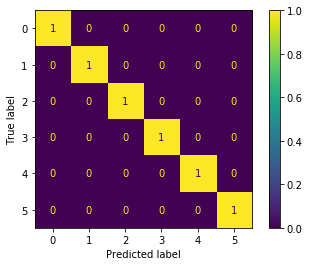

Reward sets:
(0, 0): [-1, -2, -2, -3]
(0, 1): [0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, -1, -1, -1, 0, 0, 0, 0, -1, -1, 0, -1, 0, 0, 0, -1, 0, -1, 0, -1, 0, 0, -1, 0, -2, 0, -1, 0, 0, 0, -2, 0, 0, -1, -1, 0, -1, 0, -1, 0, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -2, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, -2, 0, -1, 0, 0, 0, -2, 0]
(0, 2): [-1, -1, -2, -1, -3, 0, -1]
(0, 3): [-1, -1, -1, -2]
(0, 4): [-2, -2, -2, -3]
(0, 5): [-4, -4, -4, -4]
(0, 6): [-5, -5]
Reward set counts:
Key (0, 0): 4 items
Key (0, 1): 83 items
Key (0, 2): 7 items
Key (0, 3): 4 items
Key (0, 4): 4 items
Key (0, 5): 4 items
Key (0, 6): 2 items


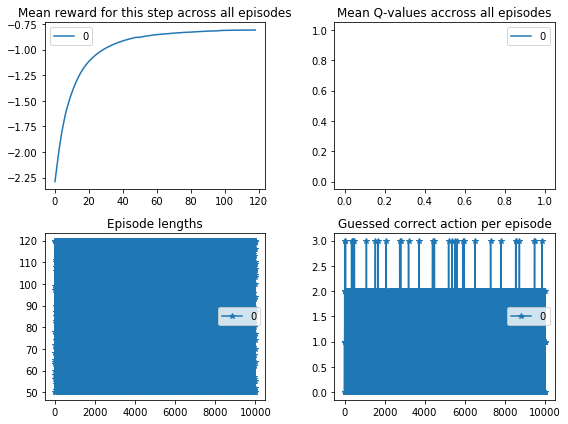

In [9]:
params = default_params()
# res = {'target': 95.89999999999999, 'params': {'alpha': 0.8236118040381998, 'alpha_decay': 243.0544785033269, 'alpha_min': 0.5113965695937486, 'epsilon': 0.25289603267158034, 'epsilon_decay': 70.53090930872196, 'epsilon_min': 0.044310479986752194, 'gamma': 0.8871072251030447, 'surrogate_c_interval': 67.76179038423699}}
# res = {'target': 90.0, 'params': {'alpha': 0.566829130247288, 'alpha_decay': 730.0449934213863, 'alpha_min': 0.27769065035047436, 'epsilon': 0.031094480749447873, 'epsilon_decay': 58.57639172904549, 'epsilon_min': 0.9146303180866909, 'gamma': 0.9020151394707286, 'surrogate_c_interval': 37.636686233313156}}
# res = {'target': 77.2, 'params': {'alpha': 0.12782984397025088, 'alpha_decay': 533.8544911600927, 'alpha_min': 0.43949661057982725, 'epsilon': 0.22232365801757625, 'epsilon_decay': 57.44371837941024, 'epsilon_min': 0.8978249479878948, 'gamma': 0.8376342805104097, 'surrogate_c_interval': 94.54441746511277}}
# 10 000
# {'target': 73.88, 'params': {'alpha': 0.4649601252136465, 'alpha_decay': 746.4731822044919, 'alpha_min': 0.36999110945925884, 'epsilon': 0.269784993802476, 'epsilon_decay': 16.09239750187774, 'epsilon_min': 0.7658419251978782, 'gamma': 0.7034185365569918, 'surrogate_c_interval': 37.941618962052665}}


params = params | res['params']

# params['']

params['noise'] = True
params['surrogate'] = False
plot_mean_q_values(params=params)

params['surrogate'] = True
plot_mean_q_values(params=params)